In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
iris = load_iris()
X = pd.DataFrame(iris.data,columns=iris.feature_names)

print(X.head())

print(X.info())

print(X.describe())

print(X.shape)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000

In [3]:
# K-Means Clustering

kmeans = KMeans(n_clusters=3,random_state=42,n_init=10)
y_kmeans = kmeans.fit_predict(X)

print("Cluster Centers:\n", kmeans.cluster_centers_)

Cluster Centers:
 [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]]


In [4]:
# Adding cluster labels to the original data

X['Cluster'] = y_kmeans
print(X.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   Cluster  
0        1  
1        1  
2        1  
3        1  
4        1  


In [6]:
#Evaluation

inertia = kmeans.inertia_
sil_score = silhouette_score(X.drop('Cluster',axis=1), y_kmeans)

print("Inertia:", inertia)
print("Silhouette Score:", sil_score)

Inertia: 78.85144142614601
Silhouette Score: 0.5528190123564095


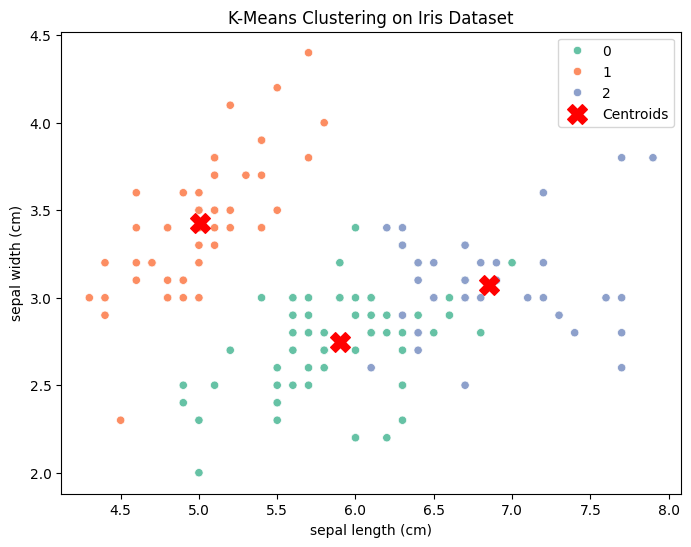

In [7]:
# Step 6: Visualize clusters (using first two features for 2D)
plt.figure(figsize=(8,6))
sns.scatterplot(x=X.iloc[:,0], y=X.iloc[:,1], hue=X['Cluster'], palette="Set2")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering on Iris Dataset")
plt.legend()
plt.show()

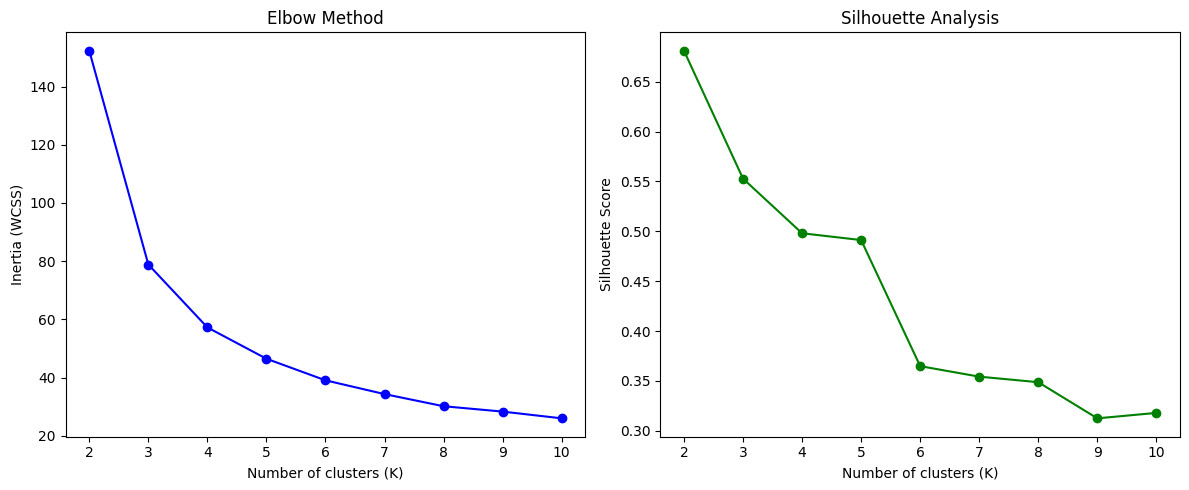

Best K (by Silhouette): 2


In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Step 1: Try multiple K values
inertia = []
sil_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    y_pred = kmeans.fit_predict(X.drop('Cluster', axis=1))  # drop previous cluster col
    
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(X.drop('Cluster', axis=1), y_pred))

# Step 2: Plot Elbow Method (Inertia vs K)
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia (WCSS)')
plt.title('Elbow Method')

# Step 3: Plot Silhouette Score vs K
plt.subplot(1,2,2)
plt.plot(K_range, sil_scores, 'go-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

plt.tight_layout()
plt.show()

# Step 4: Print best K
best_k = K_range[sil_scores.index(max(sil_scores))]
print("Best K (by Silhouette):", best_k)
